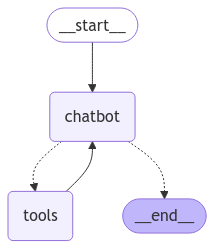

================================ Human Message =================================

what certifacate that bandar have ?
================================== Ai Message ==================================
Tool Calls:
  Search online (0e22718c-b7db-4895-95e7-dd433e663192)
 Call ID: 0e22718c-b7db-4895-95e7-dd433e663192
  Args:
    __arg1: Bandar certificate
  Document Retrieval (31b123fe-aed0-4a91-88f1-c14d9a123469)
 Call ID: 31b123fe-aed0-4a91-88f1-c14d9a123469
  Args:
    __arg1: Bandar certificate
================================= Tool Message =================================
Name: Document Retrieval

[Document(id='766a8112-8294-4336-b018-7dbb2a7aeffe', metadata={'source': './data/Bandar.pdf', 'file_path': './data/Bandar.pdf', 'page': 0, 'total_pages': 1, 'format': 'PDF 1.7', 'title': '', 'author': 'Bander Almutairi', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Microsoft 365', 'producer': 'Microsoft® Word for Microsoft 365', 'creationDate': "D:20250106081411+03'00'", 'mo

In [ ]:
from IPython.display import Image, display
from typing import Annotated
from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from PDF_Tool import pdf_tool
from SearchTool import search_tool
# add memory to remeber the previos conversation
memory = MemorySaver()
# Class to handle the updated messages without overwriting


class State(TypedDict):
    messages: Annotated[list, add_messages]


# Create state graph (Workflow) and make the input is the state
graph_builder = StateGraph(State)

# Create tools
tools = [search_tool,pdf_tool]
# Loading model
llm = ChatOllama(model="mistral")
# Nake chain between llm and tools
llm_with_tools = llm.bind_tools(tools)
tool_node = ToolNode(tools=tools)
# function for chatbot


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# add chatbot to graph
graph_builder.add_node("chatbot", chatbot)
# add tool to graph
graph_builder.add_node("tools", tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile(checkpointer=memory)

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

config = {"configurable": {"thread_id": "1"}}

user_input = "what certifacate that bandar have?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

In [1]:
# Import relevant functionality
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from PDF_Tool import pdf_tool
from CSV_Tool import csv_tool
from prompt import prompt

In [2]:
memory = MemorySaver() # To Save conversation
model =ChatOllama(model="mistral") # To Load LLM model
tools = [pdf_tool,csv_tool] # to store all tools

In [3]:
# Create the agent
agent_executor = create_react_agent(model, tools, checkpointer=memory,state_modifier=prompt) # Create agent

In [5]:
config = {"configurable": {"thread_id": "1"}}

In [8]:
# Import relevant functionality
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from PDF_Tool import pdf_tool
from CSV_Tool import csv_tool
from prompt import prompt
# Create the agent
memory = MemorySaver() # To Save conversation
model =ChatOllama(model="mistral") # To Load LLM model
tools = [pdf_tool,pdf_tool] # to store all tools
agent_executor = create_react_agent(model, tools, checkpointer=memory) # Create agent

# Use the agent




def handle_conversation():
    config = {"configurable": {"thread_id": "1"}}
    while True:
        query = input("You : ")
        if query.lower()=="exit":
            break
        input_messages = [HumanMessage(query)]
        output = agent_executor.invoke({"messages": input_messages}, config)
        output["messages"][-1].pretty_print()


if __name__=="__main__":
    handle_conversation()
    

================================== Ai Message ==================================

 To find the information about a specific Bandar, you can use the function `Bandar Information`. However, the function you provided does not have a parameter for the type of Bandar (Major, Minor, etc.). Here is an updated version:

[{"name":"Bandar Information","description":" Retrieves documents based on Bandar information","parameters":{"type":"object","required":["__arg1", "bandar_type"],"properties":{"__arg1":{"type":"string","description":""},"bandar_type":{"type":"string","enum":["Major", "Minor"]}}}]

Now you can call this function with the Bandar name and the type of Bandar (Major or Minor) as arguments. For example:

Bandar Information("Cheras", "Major")

This will return documents related to Cheras Major Bandar.


KeyboardInterrupt: Interrupted by user